<a href="https://colab.research.google.com/github/Philocreation/My_Deep_learning/blob/main/Dnn_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모듈 임포팅

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

# Keras DNN 최소코드

# 데이터 준비 

1차원 데이터 x와 x**2의 1차원 데이터 y

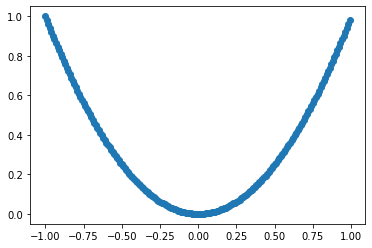

In [36]:
x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [37]:
print(len(x))
print(x.shape)

200
(200,)


## 최소 코드

아래의 코드는 최소 코드

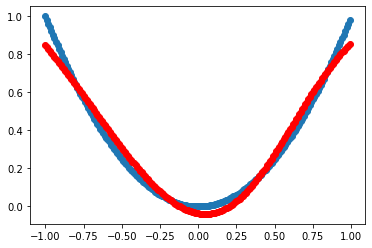

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

#모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

#컴파일 : 모델 + optimizer + loss 
model.compile(optimizer="SGD", loss="mse")

#학습 
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

#예측 
y_ = model.predict(x)

#결과 그래프로 보기
plt.scatter(x,y) #정답
plt.scatter(x,y_,color='r')# 결과 
plt.show()

# Keras DNN 최소 코드에 기본 정보만 추가

최소는 아니고, 이정도는 매번 사용하는 코드

## model,evaluate() - 성능 평가하기 

7/7 [==============================] - 0s 2ms/step - loss: 0.0018 - mae: 0.0353
loss= 0.0017981251003220677
mae= 0.03528057783842087


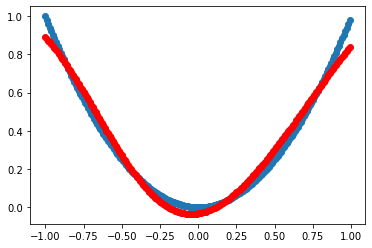

In [39]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

#모델 훈련
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

#출력에 loss와 mae가 추가되었다
loss, mae = model.evaluate(x, y)
print("loss=", loss)
print("mae=", mae)

y_ = model.predict(x)

plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()


#테스트셋으로 평가하기

데이터를 train과 test으로 나우어 준비한다.

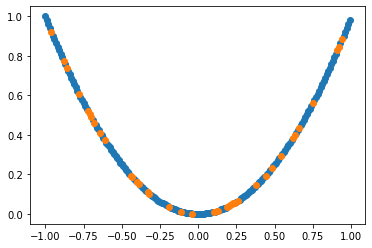

In [40]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

i = int(x.shape[0]*0.8)

train_x, test_x = x[:i], x[i:]
train_y, test_y = y[:i], y[i:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show() 

2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - mae: 0.0290
loss= 0.0010472291614860296
mae= 0.029031192883849144


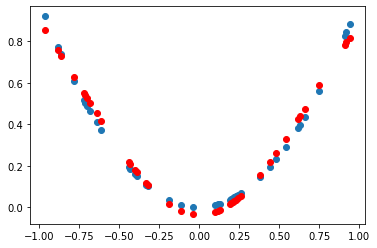

In [41]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

#model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

#출력에 loss와 mae가 추가되었다
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

#y_ = model.predict(x)
y_ = model.predict(test_x)

#plt.scatter(x,y)
plt.scatter(test_x,test_y)

#plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

train_x, train_y로 학습, evaluate()와 predict()는 test_x, test_y를 사용함

그려진 그림에서 test_x의 점 사이에 빈간격은 train_x에 해당한다. 

#Base Model 결과 저장

이후 비교를 위해 그래프를 저장해 둔다.

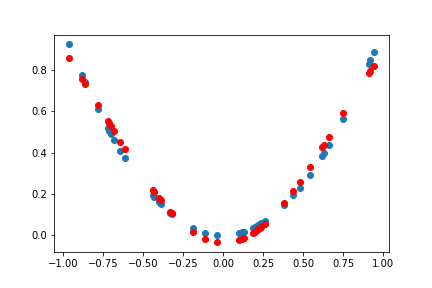

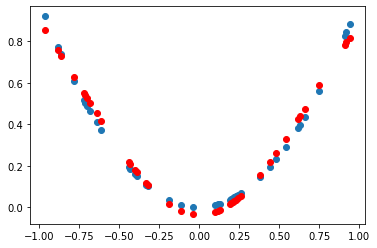

In [42]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.savefig("graph_result.png")

from IPython.display import Image
display(Image("graph_result.png"))

## 학습 시간을 출력

elapsed : 11.558704376220703
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - mae: 0.0398
loss= 0.0018770068418234587
mae= 0.03982299566268921


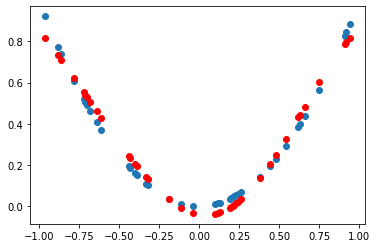

In [43]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

#학습 시간을 출력
start_time = time.time()  # <-------추가----------
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}". format(time.time() - start_time)) # <-------추가----------

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## model.summary() 네트워크 모양 보기

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 10)                20        
                                                                 
 dense_96 (Dense)            (None, 10)                110       
                                                                 
 dense_97 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.66845440864563
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0392
loss= 0.002211353275924921
mae= 0.039241544902324677


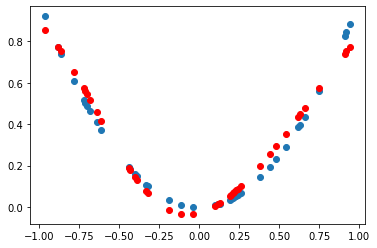

In [44]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary() # <-------추가----------

start_time = time.time()  
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}". format(time.time() - start_time)) 

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

노드 10개, 10개를 갖는 은닉층이 2개
모든 레이어는 activation(w*x+b)의 형태로,

첫번쨰 은닉층은 [ 20개 = (1+1)*10 = (입력수+1)*10 ]

두번쨰 은닉층은 [ 110개 = (10+1)*10 ]
의 가중치가 있다. 

## 모델 그리기


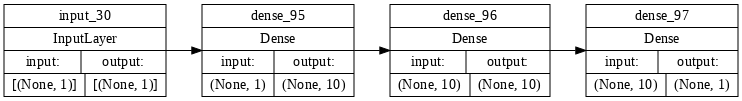

In [45]:
tf.keras.utils.plot_model(model=model, rankdir="LR", dpi=72, show_shapes=True)

# Keras DNN Template

본 실습에 사용되는 코드의 템플릿

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 10)                20        
                                                                 
 dense_99 (Dense)            (None, 10)                110       
                                                                 
 dense_100 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.696949481964111
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - mae: 0.0313
loss= 0.001186041859909892
mae= 0.03133713826537132


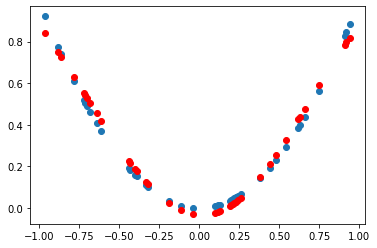

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# layer 수

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

## 히든 레이어 1개

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 10)                20        
                                                                 
 dense_102 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.109448194503784
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - mae: 0.0474
loss= 0.0026874246541410685
mae= 0.047350846230983734


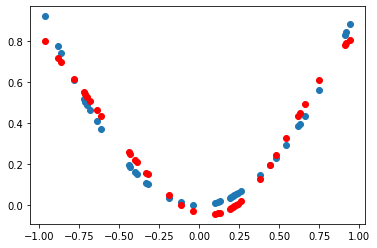

In [48]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# base 모델의 결과
display(Image("base_result.png")) # <-------추가----------

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 히든 레이어 5개일 떄 

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 10)                20        
                                                                 
 dense_104 (Dense)           (None, 10)                110       
                                                                 
 dense_105 (Dense)           (None, 10)                110       
                                                                 
 dense_106 (Dense)           (None, 10)                110       
                                                                 
 dense_107 (Dense)           (None, 10)                110       
                                                                 
 dense_108 (Dense)           (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable

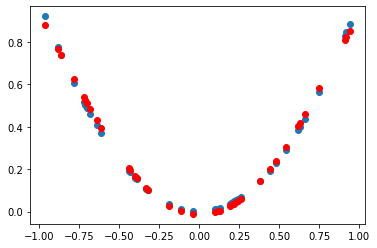

In [49]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

display(Image("base_result.png")) 
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 히든 레이어 10개

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 10)                20        
                                                                 
 dense_110 (Dense)           (None, 10)                110       
                                                                 
 dense_111 (Dense)           (None, 10)                110       
                                                                 
 dense_112 (Dense)           (None, 10)                110       
                                                                 
 dense_113 (Dense)           (None, 10)                110       
                                                                 
 dense_114 (Dense)           (None, 10)                110       
                                                                 
 dense_115 (Dense)           (None, 10)              

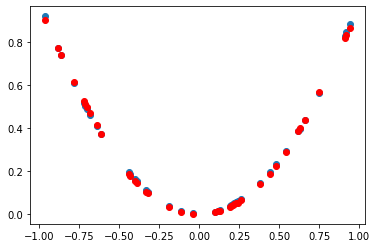

In [50]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

display(Image("base_result.png")) 
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 히든 레이어 없을 때

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.23787546157837
2/2 [==============================] - 0s 5ms/step - loss: 0.0808 - mae: 0.2492
loss= 0.08082137256860733
mae= 0.24916128814220428


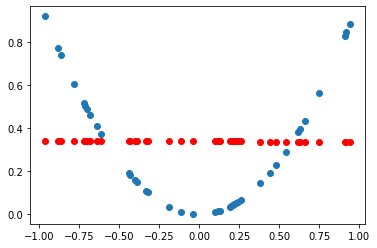

In [51]:
model = keras.Sequential()
model.add(Input(1))
#model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# base 모델의 결과
display(Image("base_result.png")) # <-------추가----------

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# node 수

## 노드 : 10

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 10)                20        
                                                                 
 dense_122 (Dense)           (None, 10)                110       
                                                                 
 dense_123 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.640958786010742
2/2 [==============================] - 0s 3ms/step - loss: 9.5984e-04 - mae: 0.0267
loss= 0.0009598387405276299
mae= 0.02670733630657196


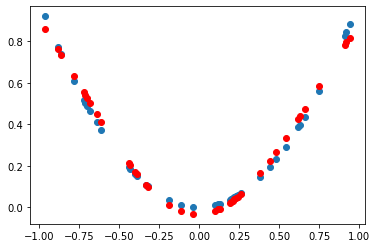

In [53]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

display(Image("base_result.png")) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 노드 : 5

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 5)                 10        
                                                                 
 dense_125 (Dense)           (None, 5)                 30        
                                                                 
 dense_126 (Dense)           (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.77690601348877
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0343
loss= 0.001863956800661981
mae= 0.034336332231760025


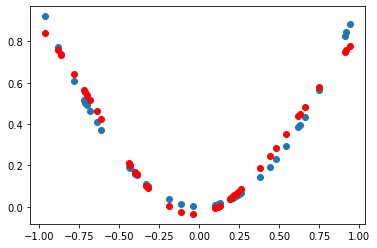

In [54]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(5, activation='tanh')) # <-------추가----------
model.add(Dense(5, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

display(Image("base_result.png")) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 노드 : 1

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 1)                 2         
                                                                 
 dense_128 (Dense)           (None, 1)                 2         
                                                                 
 dense_129 (Dense)           (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.684304475784302
2/2 [==============================] - 0s 4ms/step - loss: 0.0787 - mae: 0.2461
loss= 0.07873009890317917
mae= 0.24611613154411316


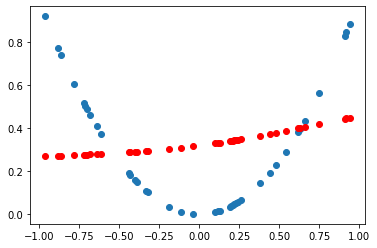

In [55]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(1, activation='tanh')) # <-------추가----------
model.add(Dense(1, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

display(Image("base_result.png")) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# sin 데이터 

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

In [57]:
def sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  i = int(x.shape[0]*0.6)

  train_x, test_x = x[:i], x[i:]
  train_y, test_y = y[:i], y[i:]

  return (train_x, train_y), (test_x, test_y)

# 학습 추가 진행

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf 
from tensorflow import keras 

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

모델은 그대로 데이터만 sin 데이터로 변경


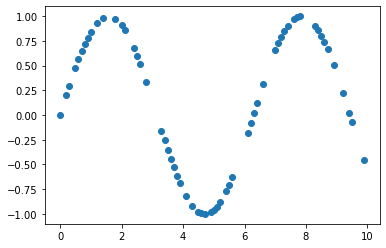

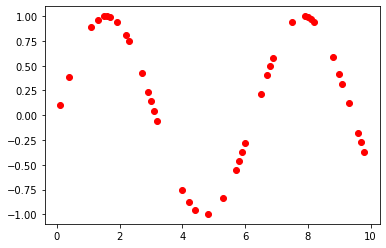

In [59]:
(train_x, train_y), (test_x, test_y) = sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x, train_y)
plt.show()

plt.scatter(test_x, test_y, color='r')
plt.show()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 10)                20        
                                                                 
 dense_131 (Dense)           (None, 10)                110       
                                                                 
 dense_132 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.557088375091553
2/2 [==============================] - 0s 5ms/step - loss: 0.1932 - mae: 0.3429
loss= 0.19316326081752777
mae= 0.3428921699523926


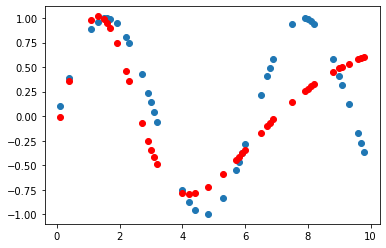

In [60]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) 
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 추가 학습 진행

In [61]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):
  
  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("출력 시간: {}".format(time.time() - start_time))

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("학습 횟수 : {}: ".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)

학습 횟수 : 0: 
출력 시간: 5.312037944793701


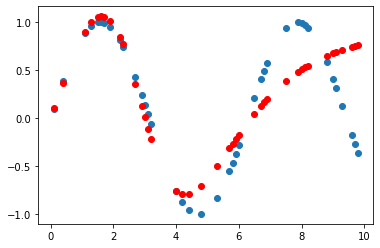

학습 횟수 : 1: 
출력 시간: 5.295485496520996


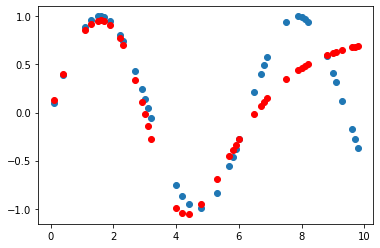

학습 횟수 : 2: 
출력 시간: 5.296707391738892


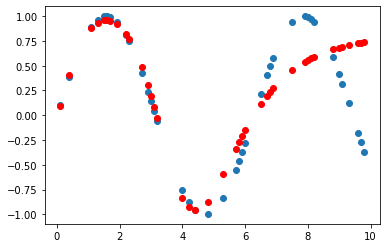

학습 횟수 : 3: 
출력 시간: 5.3167548179626465


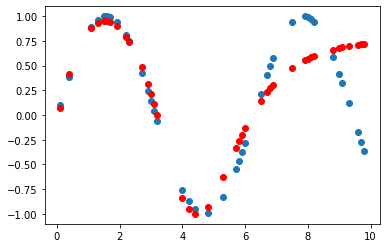

학습 횟수 : 4: 
출력 시간: 5.3076653480529785


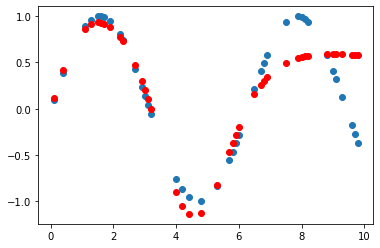

학습 횟수 : 5: 
출력 시간: 5.250341415405273


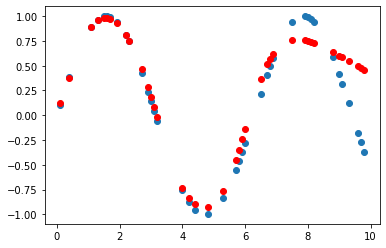

학습 횟수 : 6: 
출력 시간: 5.261011600494385


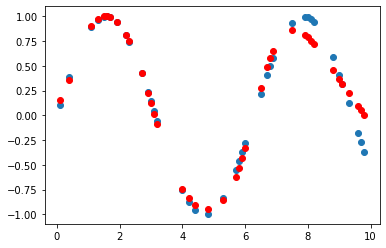

학습 횟수 : 7: 
출력 시간: 5.35513973236084


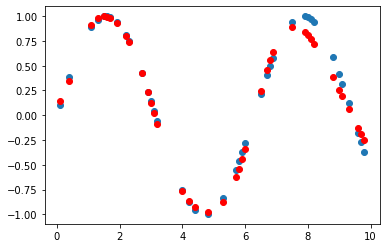

학습 횟수 : 8: 
출력 시간: 5.400288105010986


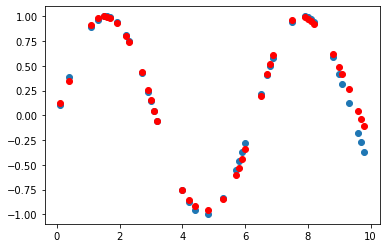

학습 횟수 : 9: 
출력 시간: 5.335179090499878


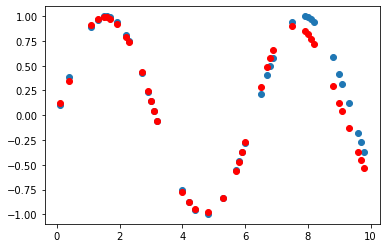

In [62]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

# model.fit()의 batch_size

<br>
batch_size는 GPU와 관련된 옵션이다. 

한번에 GPU에 보내는 데이터의 수이다.

<br>
batch_sizer가 1일 경우, 1개를 보내고, 1개의 결과를 받고 1번 가중치를 업데이트한다.

batch_size가 10일 경우, 10개를 보내고, 10개의 결과를 한번에 받고 1번 가중치를 업데이트한다.

<br>
GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터 수가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다.

복수의 데이터를 한번에 보내어 한번에 연산을 할 수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산시간을 줄일 수 있다. 

하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다. 



In [63]:
def build_model():
  
  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=['mse'])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size) 

In [64]:
(train_x, train_y), (test_x, test_y) = sin_data(start=0, end=10, step=0.1)

## batch_size 적용 :[1,2,5,10,20,50,100,200,500]

batch_size=1
출력 시간: 74.05971908569336


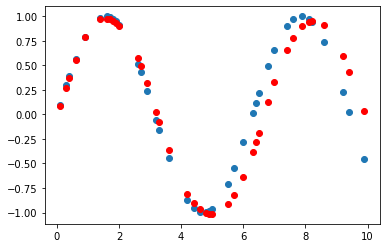

batch_size=2
출력 시간: 38.18341088294983


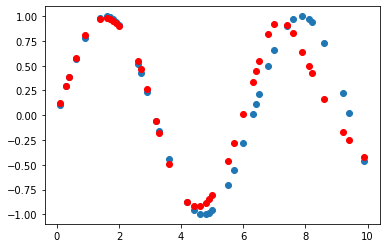

batch_size=5
출력 시간: 16.580841064453125


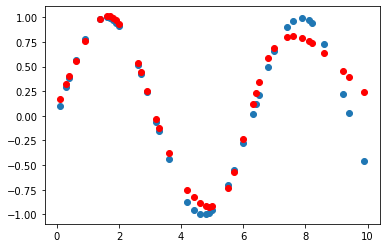

batch_size=10
출력 시간: 9.074291467666626


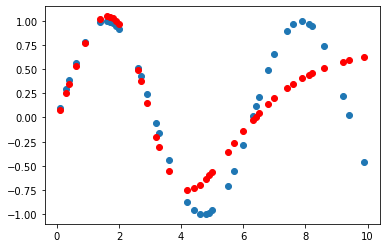

batch_size=20
출력 시간: 5.334235668182373


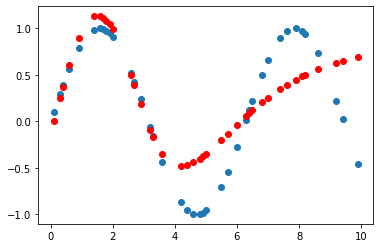

batch_size=50
출력 시간: 4.889629125595093


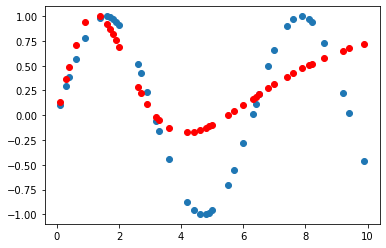

batch_size=100
출력 시간: 3.3429229259490967


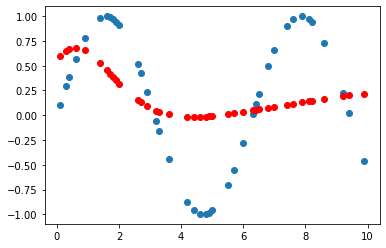

batch_size=200
출력 시간: 3.338006019592285


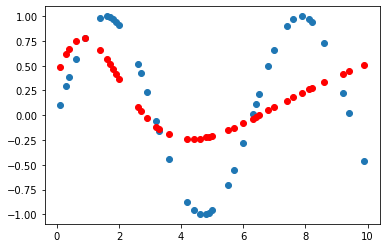

batch_size=500
출력 시간: 3.351144313812256


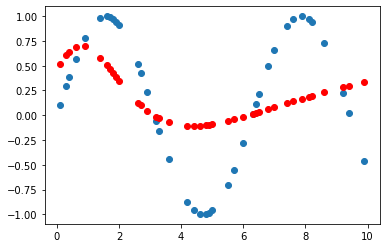

In [65]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

batch_size를 키우면, 시간은 줄어들지만 학습이 빠르게 진행되지 않는다.

# model.fit() verbose

- 0 : 진행하면서 아무런 출력 없이
- 1 : 진행하면서 출력과 같이 

In [66]:
(train_x, train_y), (test_x, test_y) = sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

print(train_x.shape)

start_time = time.time()
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=20)
print("출력 시간 : {}".format(time.time() - start_time))

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 10)                20        
                                                                 
 dense_161 (Dense)           (None, 10)                110       
                                                                 
 dense_162 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
(60000,)
Epoch 1/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2811 - mae: 0.4402
Epoch 2/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1404 - mae: 0.2755
Epoch 3/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0849 - mae: 0.1911
Epoch 4/5
3000/3000 [=

# loss 보기 

In [33]:
(train_x, train_y), (test_x, test_y) = sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("출력 시간: {}".format(time.time() - start_time))

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 10)                20        
                                                                 
 dense_81 (Dense)            (None, 10)                110       
                                                                 
 dense_82 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
출력 시간: 5.450561761856079


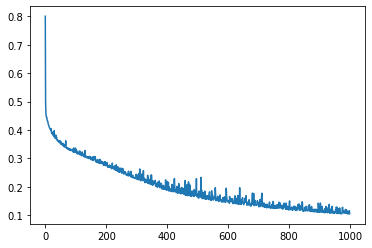

In [34]:
plt.plot(history.history['loss'])
plt.show()

# 학습 시에 validation

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

## model.fit()의 validation_data

In [70]:
(train_x, train_y), (test_x, test_y) = sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer='SGD', loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_data=(test_x, test_y))
print("출력 시간 ; {}".format(time.time() - start_time))

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_163 (Dense)           (None, 10)                20        
                                                                 
 dense_164 (Dense)           (None, 10)                110       
                                                                 
 dense_165 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
출력 시간 ; 21.59030508995056


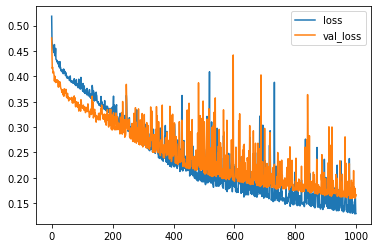

In [71]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

## model.fit()의 validation_split

<br>
따로 vaiidation 데이터를 주지 않고, test 데이터로 준 것의 일부를 validation에 사용.

validation에 사용된 데이터는 학습에 사용되지 않는다. 

In [76]:
(train_x, train_y), (test_x, test_y) = sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary() 

start_time = time.time()
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
print("출력시간 : {}".format(time.time() - start_time))

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_169 (Dense)           (None, 10)                20        
                                                                 
 dense_170 (Dense)           (None, 10)                110       
                                                                 
 dense_171 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
출력시간 : 22.97380757331848


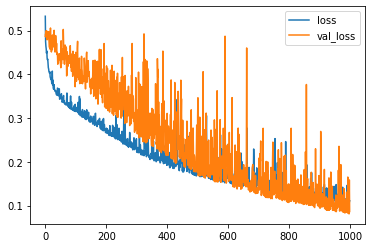

In [77]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# 데이터 크기와 epoch 수

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time 

In [82]:
(train_x, train_y), (test_x, test_y) = sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=20)
print(" 경과 시간 : {}".format(time.time() - start_time))

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_175 (Dense)           (None, 10)                20        
                                                                 
 dense_176 (Dense)           (None, 10)                110       
                                                                 
 dense_177 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3000/3000 - 4s - loss: 0.2498 - mae: 0.4145 - 4s/epoch - 1ms/step
Epoch 2/5
3000/3000 - 4s - loss: 0.1385 - mae: 0.2708 - 4s/epoch - 1ms/step
Epoch 3/5
3000/3000 - 4s - loss: 0.1102 - mae: 0.2211 - 4s/epoch - 1ms/step
Epoch 4/5
3000/3000 - 4s - loss: 0.0851 - mae: 0.1921 - 4s/epoch - 1ms/step
Epoch 5/5
3000/

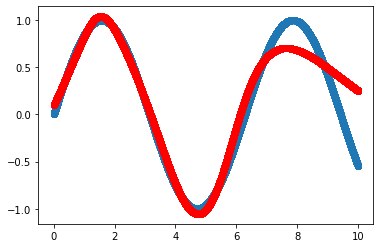

In [84]:
y_ = model.predict(test_x)

plt.scatter(test_x, test_y)
plt.scatter(test_x,y_,color='r')
plt.show() 

epoch가 적어도 데이터 수가 많으면 학습이 잘된다. 

# Shuffle

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

## 전체 데이터 준비 시에 

60


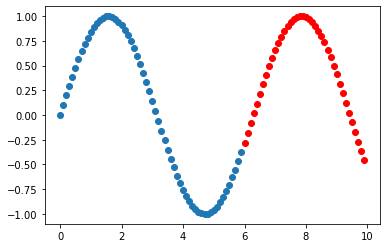

In [86]:
x = np.arange(0,10,0.1)
y = np.sin(x)

i = int(x.shape[0]*0.6)
print(i)

train_x, test_x = x[:i], x[i:]
train_y, test_y = y[:i], y[i:] 

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_181 (Dense)           (None, 10)                20        
                                                                 
 dense_182 (Dense)           (None, 10)                110       
                                                                 
 dense_183 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


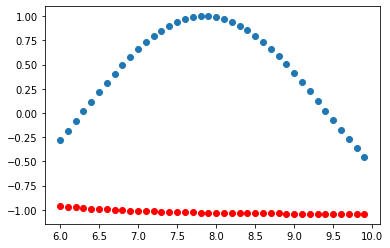

In [89]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

model.fit(train_x, train_y, epochs=2000, verbose=0, batch_size=20)

y_ = model.predict(test_x)

plt.scatter(test_x, test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

train 데이터 와 test 데이터가 서로 떨어져 있다. 

train 영역의 데이터로 학습된 모델은 test영역의 데이터에 적용하지 못한다. 

전체데이터를 잘섞어주고, 이를 train, test로 나누어야 한다.

60


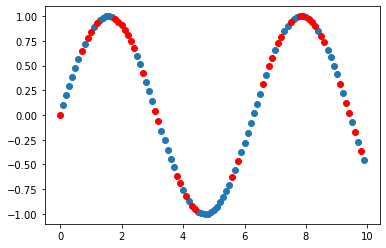

In [90]:
x = np.arange(0,10,0.1)
np.random.shuffle(x) # <--------추가------------
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 10)                20        
                                                                 
 dense_185 (Dense)           (None, 10)                110       
                                                                 
 dense_186 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


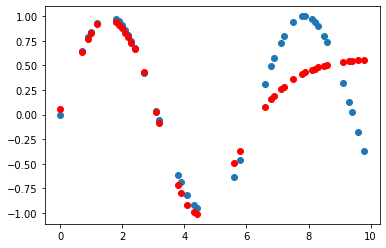

In [92]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

model.fit(train_x, train_y, epochs=2000, verbose=0, batch_size=20)

y_ = model.predict(test_x)

plt.scatter(test_x, test_y)
plt.scatter(test_x,y_,color='r')
plt.show() 

## 데이터 쌍 유지하면서 섞기

In [106]:
x = np.arange(0,10,0.1)
y = x

indexes = np.arange(len(x))
print(indexes)
np.random.shuffle(indexes)
print(indexes)

print(x[:10])
print(y[:10])

x = x[indexes]
y = y[indexes]

print(x[:10])
print(y[:10])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[34 75 79 11 51 61 93 21  3 71 47 40 32 77 54 68 48 98 31 38  7 25 50 41
 19 43 30 16 23  8 15 74  5 96 97 76 87 44 80 56 85 73 35 90 26  1 36 70
 55 45 81 64 53 82 60 28 20 88 62 58 24  2 99 14 78  0 42  6 57 91 67 63
 12 18 92 33 84 10 37 65 83 66 39  9 13 95 69 46 72 59 29 17 86 89 22  4
 49 52 94 27]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[3.4 7.5 7.9 1.1 5.1 6.1 9.3 2.1 0.3 7.1]
[3.4 7.5 7.9 1.1 5.1 6.1 9.3 2.1 0.3 7.1]


##  학습 진행 시에 

학습 시에 데이터를 섞어 주지 않으면 특정 데이터 순서로 학습이 일어나 편향이 생길 수 있다. 

In [114]:
(train_x, train_y), (test_x, test_y) = sin_data(start=0, end=10, step=0.1)

# 모델 저장과 로딩 

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_190 (Dense)           (None, 10)                20        
                                                                 
 dense_191 (Dense)           (None, 10)                110       
                                                                 
 dense_192 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
경과 시간: 5.488204717636108
2/2 [==============================] - 0s 5ms/step - loss: 0.2649 - mae: 0.4272
loss=  0.2649078965187073
mae==  0.3428921699523926


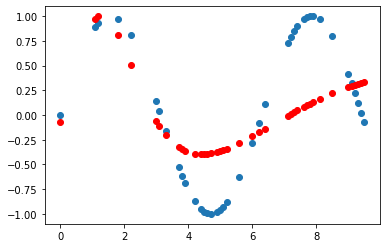

In [115]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("경과 시간: {}".format(time.time() - start_time))

loss, mse = model.evaluate(test_x, test_y)
print("loss= ", loss)
print("mae== ", mae)

y_ = model.predict(test_x)

plt.scatter(test_x, test_y)
plt.scatter(test_x,y_,color='r')
plt.show()
                 

# 모델 저장 

In [117]:
model.save('my_model.h5')

!ls -al 

total 64
drwxr-xr-x 1 root root  4096 Dec 31 07:21 .
drwxr-xr-x 1 root root  4096 Dec 31 05:29 ..
drwxr-xr-x 4 root root  4096 Dec  3 14:33 .config
-rw-r--r-- 1 root root  9676 Dec 31 06:08 graph_result.png
drwxr-xr-x 2 root root  4096 Dec 31 07:21 .ipynb_checkpoints
-rw-r--r-- 1 root root  7757 Dec 31 06:09 model.png
-rw-r--r-- 1 root root 20736 Dec 31 07:21 my_model.h5
drwxr-xr-x 1 root root  4096 Dec  3 14:33 sample_data


모델 로딩 

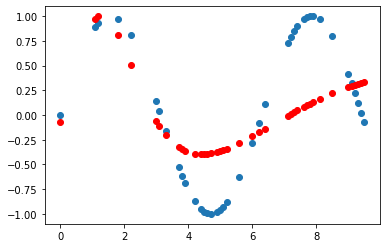

In [118]:
new_model = keras.models.load_model('my_model.h5')

y_ = new_model.predict(test_x) 

plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r')
plt.show()